# Data preparation

In [2]:
import pandas as pd
import numpy as np

Data taken from: https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset

In [5]:
players = pd.read_csv("players_22.csv")

<ipython-input-5-08b1a8bf1ee9>:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv("players_22.csv")


In [6]:
players.head(3)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


In [7]:
#Select the data we are going to use.
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [8]:
#Filter missing values.
players = players.dropna(subset=features)

In [9]:
#Create a new data set with the features we want.
data = players[features].copy()

In [10]:
#Note we don't have any name, but we can easily identify them
# cros-validating their id.
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


# Step by step plan


1. Scale data to standardize values.
2. Initialize random centroids.
3. Get labels for each data point.
4. Create new centroids.
5. Plot the centroids.
6. Repeat 3 to 5 until the centroids stop changing.

**First step: We are going to rescale the data values so that our algorithm works with smaller numbers. Also, this way we make sure the algorithm works with numbers that are not too far appart from each other.**

**We do not care to much about the exact values, but we do care about their relation. So, this rescaling does not change our objective.**

**Also, we arbitrarily scale to 1 to 11 interval.**

In [12]:
#Rescalling to a 1 to 11 interval.
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1

In [13]:
#Lets check the rescaling.
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,5.078302,5.799998,1.243826,1.146473,4.403716
std,1.496262,1.323418,0.557253,0.392477,1.750932
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.043478,4.913043,1.014306,1.024022,2.851852
50%,5.130435,5.782609,1.071531,1.049796,4.333333
75%,6.000000,6.652174,1.214592,1.102634,5.814815
max,11.000000,11.000000,11.000000,11.000000,11.000000


In [14]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,11.000000,10.565217,10.141631,5.020341,7.666667
1,10.782609,10.347826,8.711016,7.159616,6.925926
2,10.565217,10.130435,8.711016,3.319231,8.407407
3,10.565217,10.130435,8.711016,7.649329,5.814815
4,10.565217,10.130435,11.000000,7.468908,6.185185


In [15]:
# Asign ramdomly data to a centroid.
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample())) #Randomly select the initial centroid.
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [16]:
#Arbitrary choosing 5 centroids.
centroids = random_centroids(data, 5)

In [17]:
centroids

,0,1,2,3,4
overall,3.391304,4.695652,3.608696,5.347826,5.782609
potential,5.347826,4.260870,5.565217,4.913043,6.000000
wage_eur,1.000000,1.157368,1.042918,1.071531,1.042918
value_eur,1.040775,1.056240,1.051085,1.008815,1.118098
age,2.851852,3.222222,5.814815,4.703704,3.592593


In [19]:
#First centroid values.
centroids.iloc[:,0]

overall      3.391304
potential    5.347826
wage_eur     1.000000
value_eur    1.040775
age          2.851852
Name: 0, dtype: float64

In [28]:
#Function that takes a filtered data set and assign a centroid for each
# data point taking the min value of the centroids distances.
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1))) #distances from centroids.
    return distances.idxmin(axis=1) #getting the least distant centroid.

In [29]:
labels = get_labels(data, centroids)

In [30]:
labels.value_counts()

4    6187
3    5703
0    4596
2    1890
1     789
dtype: int64

In [31]:
# Using a geometric mean to get a new optimized centroid.
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [33]:
#Function that plots the centroids in a 2D scale using the library
# sklear.decomposition.
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2) #Declare that the output should be 2D.
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True) #Used to re-plot multiple times in the same plot.
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

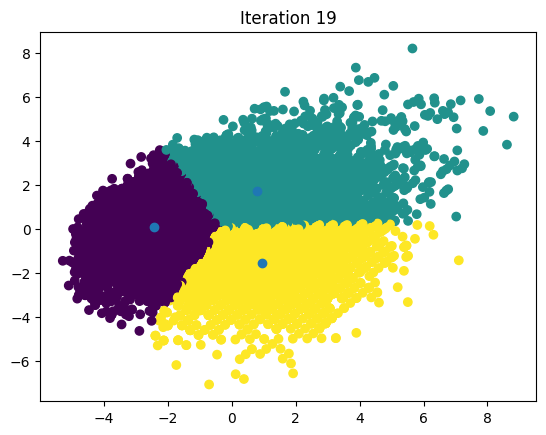

In [35]:
max_iterations = 100
centroid_count = 3 #The number of centroids or our 'K' value.

centroids = random_centroids(data, centroid_count) #Initalize centroids.
old_centroids = pd.DataFrame() #Created to compare in a time line.

iteration = 1

#Here we are going to plot and let evolve the algorithm until they stop to change.
while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(data, centroids) #Asign the area of the centroids.
    centroids = new_centroids(data, labels, centroid_count) #Re-arrange the centroids.
    plot_clusters(data, labels, centroids, iteration) #Make the plots.
    iteration += 1

In [37]:
#Lets see the result of the algorithm.
centroids

,0,1,2
overall,3.443294,6.336567,5.200401
potential,5.362259,7.107863,4.894314
wage_eur,1.031502,1.460086,1.130802
value_eur,1.029525,1.313192,1.049844
age,2.678624,3.877681,5.962199


In [38]:
labels.value_counts() #Number of data points inside each centroid area.

2    7192
0    6198
1    5775
dtype: int64

In [40]:
#Cross validating the information of the centroid '0' data points.
players[labels == 0][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
7025,Sandeiro Leal,68,68,7000.0,1400000.0,21
8028,Narcisso Mau,67,67,4000.0,1100000.0,21
8029,Botelhinonsa,67,67,4000.0,1100000.0,21
8030,Edenildo Lagoas,67,67,3000.0,1100000.0,21
8040,Dener Rolim,67,67,4000.0,1200000.0,21
...,...,...,...,...,...,...
19234,Song Defu,47,52,1000.0,70000.0,22
19235,C. Porter,47,59,500.0,110000.0,19
19236,N. Logue,47,55,500.0,100000.0,21
19237,L. Rudden,47,60,500.0,110000.0,19


# Now we are going to use KMeans implented feature in sklearn to compare our hand made model

In [41]:
from sklearn.cluster import KMeans

In [43]:
kmeans = KMeans(3)
kmeans.fit(data) #Using the same filterd data we used in our model.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [60]:
#Showing the results of the sklearn library.
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
overall,3.883814,6.803929,5.222496
potential,5.671325,7.241593,4.892155
wage_eur,1.044172,1.726296,1.125242
value_eur,1.039613,1.457205,1.044399
age,2.899334,4.486728,6.122413


# Conclusion

In conclusion we see that our model is in accordance with the well tested pre-made KMeans feature of scikit-learn.

I do not dare to make exact asumptions because of the random nature of the process. But even if the centroids are shifted or the values are sligthly different from one example to the other, they have the same equivalet information.